<a href="https://colab.research.google.com/github/IJSK10/Analyzing-Classification-and-Feature-Selection-Strategies-for-Diabetes-Prediction/blob/main/Dataset_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
string_to_int= preprocessing.LabelEncoder()
import matplotlib.pyplot as pyplot

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.impute import SimpleImputer
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn.svm import SVC
from sklearn.inspection import permutation_importance
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression



from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import mutual_info_classif


from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score

import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import LabelEncoder
from lime.lime_tabular import LimeTabularExplainer
import lime
import shap

In [ ]:
pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 2.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283835 sha256=989a121c965776ecebc55e796090a683ce94755c0b33965c39339ac274fc90eb
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [ ]:
pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 533.5/533.5 kB 3.5 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Folder/Dataset-1-diabetes_dataset__2019-categorical input.csv")


In [ ]:
A = data.drop(columns=['Diabetic'])
B =data['Diabetic']

In [ ]:
#pre processing
X1 = data.drop(columns=['Diabetic'])
M=data['Diabetic']
print(X1)
data=data.apply(string_to_int.fit_transform)
print(data)
X = data.drop(columns=['Diabetic'])
y = data['Diabetic']

              Age  Gender Family_Diabetes highBP      PhysicallyActive   BMI  \
0           50-59    Male              no    yes        one hr or more  39.0   
1           50-59    Male              no    yes  less than half an hr  28.0   
2           40-49    Male              no     no        one hr or more  24.0   
3           50-59    Male              no     no        one hr or more  23.0   
4           40-49    Male              no     no  less than half an hr  27.0   
..            ...     ...             ...    ...                   ...   ...   
947  less than 40    Male             yes     no  more than half an hr  25.0   
948   60 or older    Male             yes    yes  more than half an hr  27.0   
949   60 or older    Male              no    yes                  none  23.0   
950   60 or older    Male              no    yes  less than half an hr  27.0   
951   60 or older  Female             yes    yes        one hr or more  30.0   

    Smoking Alcohol  Sleep  SoundSleep 

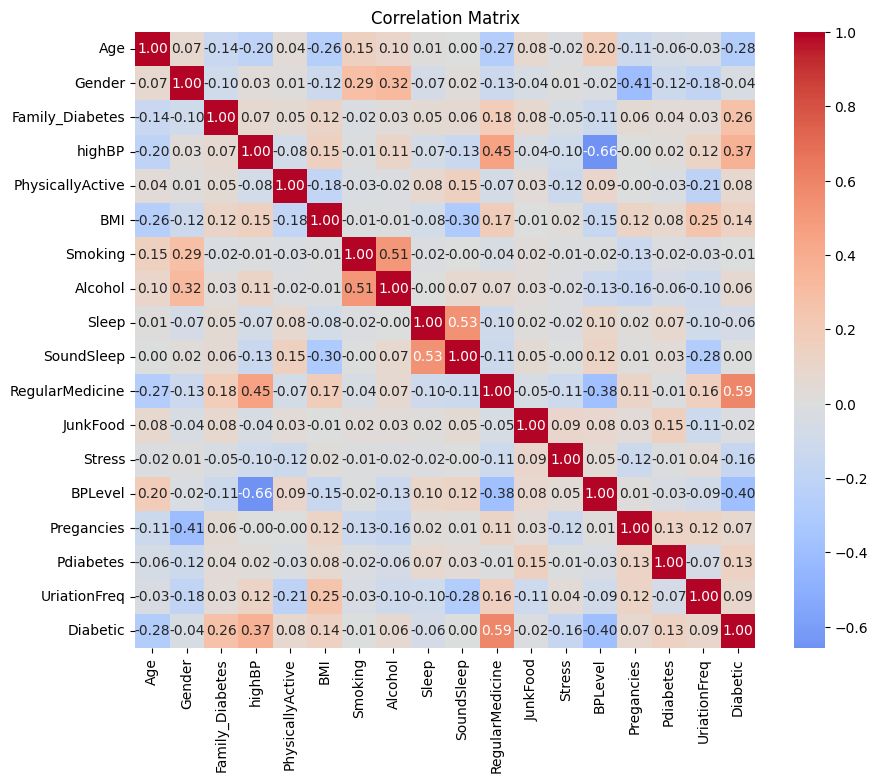

In [ ]:
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

             Feature  Importance
10   RegularMedicine    0.208048
0                Age    0.167740
5                BMI    0.091369
9         SoundSleep    0.073416
13           BPLevel    0.063867
12            Stress    0.062681
4   PhysicallyActive    0.060477
8              Sleep    0.058884
2    Family_Diabetes    0.046085
3             highBP    0.040970
14        Pregancies    0.025603
11          JunkFood    0.023552
7            Alcohol    0.018703
16      UriationFreq    0.018321
1             Gender    0.016657
15         Pdiabetes    0.015473
6            Smoking    0.008157


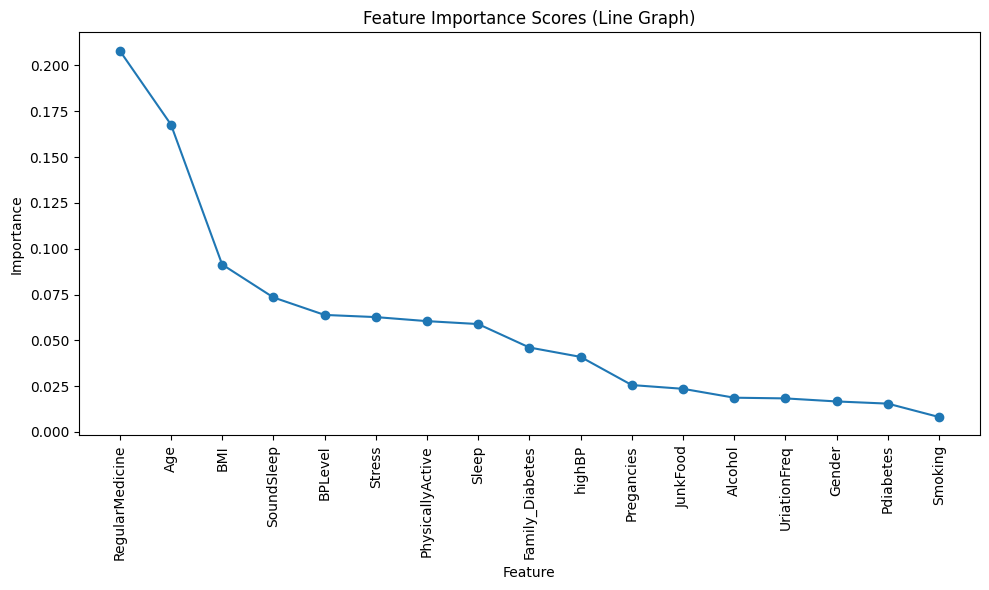

In [ ]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X, y)
feature_importances1 = clf.feature_importances_
feature_importance_df1 = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances1})
feature_importance_df1 = feature_importance_df1.sort_values(by='Importance', ascending=False)
print(feature_importance_df1)
plt.figure(figsize=(10, 6))
plt.plot(feature_importance_df1['Feature'], feature_importance_df1['Importance'], marker='o')
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance Scores (Line Graph)')
plt.tight_layout()
plt.show()

             Feature  Importance
10   RegularMedicine    0.408238
15         Pdiabetes    0.187245
0                Age    0.056951
6            Smoking    0.049932
2    Family_Diabetes    0.039380
13           BPLevel    0.036963
8              Sleep    0.031384
12            Stress    0.029181
4   PhysicallyActive    0.025587
9         SoundSleep    0.023176
1             Gender    0.022304
11          JunkFood    0.020703
7            Alcohol    0.017839
5                BMI    0.017147
14        Pregancies    0.017054
3             highBP    0.009346
16      UriationFreq    0.007570


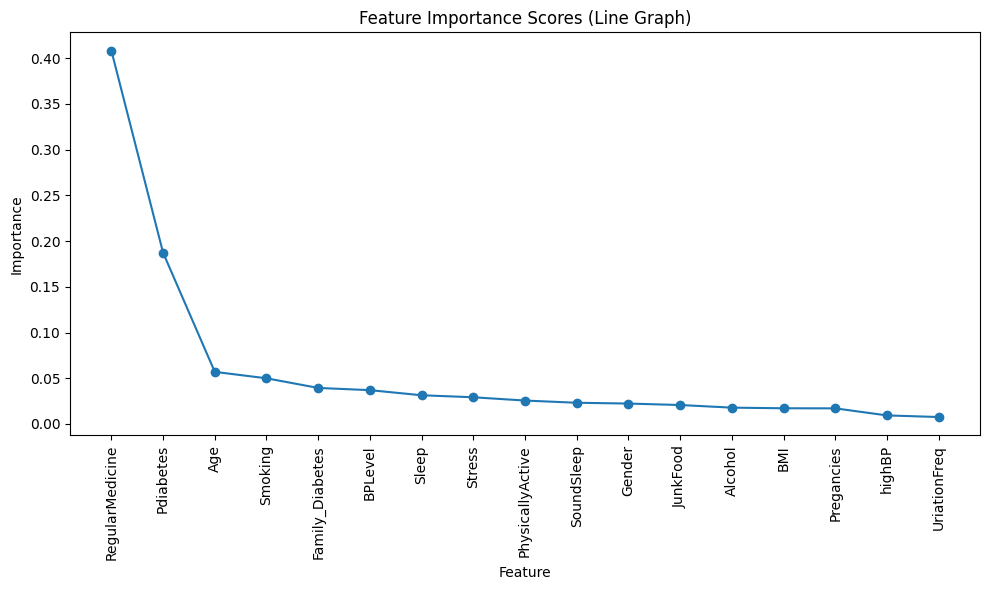

In [ ]:
model = xgb.XGBClassifier(n_estimators=100, random_state=42)
model.fit(X, y)
feature_importances2 = model.feature_importances_
feature_importance_df2 = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances2})
feature_importance_df2 = feature_importance_df2.sort_values(by='Importance', ascending=False)
print(feature_importance_df2)
plt.figure(figsize=(10, 6))
plt.plot(feature_importance_df2['Feature'], feature_importance_df2['Importance'], marker='o')
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance Scores (Line Graph)')
plt.tight_layout()
plt.show()

             Feature  Importance
10   RegularMedicine    0.432457
0                Age    0.135495
5                BMI    0.083240
9         SoundSleep    0.065276
4   PhysicallyActive    0.057533
13           BPLevel    0.042404
12            Stress    0.037562
2    Family_Diabetes    0.034657
8              Sleep    0.029647
15         Pdiabetes    0.025967
14        Pregancies    0.017946
7            Alcohol    0.011998
3             highBP    0.010058
16      UriationFreq    0.005400
1             Gender    0.005327
11          JunkFood    0.004446
6            Smoking    0.000587


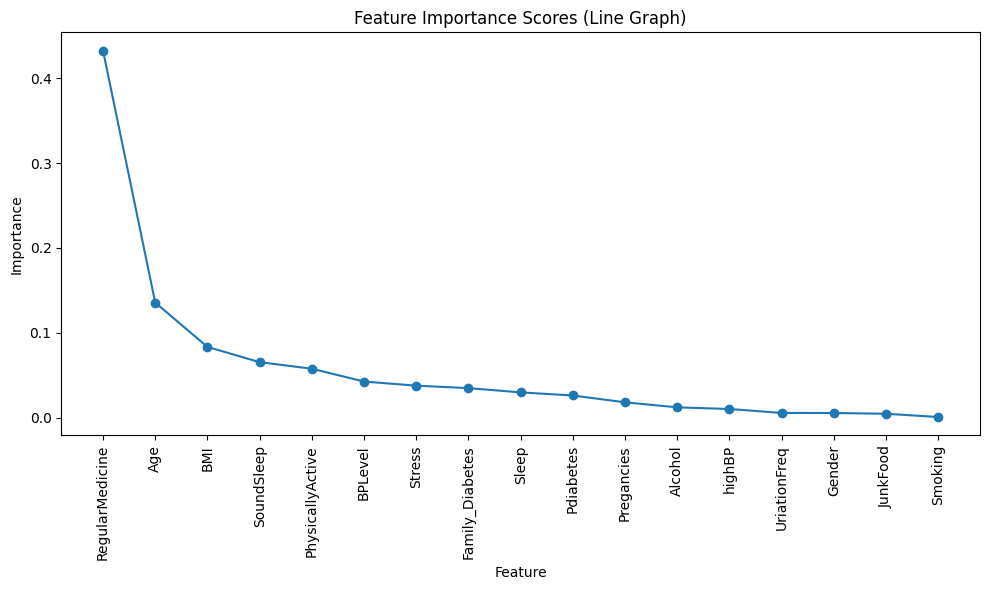

In [ ]:
model = GradientBoostingClassifier(n_estimators=100, random_state=42)
model.fit(X, y)
feature_importances3 = model.feature_importances_
feature_importance_df3 = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances3})
feature_importance_df3 = feature_importance_df3.sort_values(by='Importance', ascending=False)
print(feature_importance_df3)
plt.figure(figsize=(10, 6))
plt.plot(feature_importance_df3['Feature'], feature_importance_df3['Importance'], marker='o')
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance Scores (Line Graph)')
plt.tight_layout()
plt.show()

RegularMedicine : 0.2195
BMI : 0.0454
Age : 0.0137
Stress : 0.0109
Pregancies : 0.0097
PhysicallyActive : 0.0053
Family_Diabetes : 0.0046
BPLevel : 0.0034
SoundSleep : 0.0034
JunkFood : 0.0027
UriationFreq : 0.0019
Sleep : 0.0011
Gender : 0.0008
highBP : 0.0006
Smoking : 0.0002
Pdiabetes : 0.0002
Alcohol : 0.0000


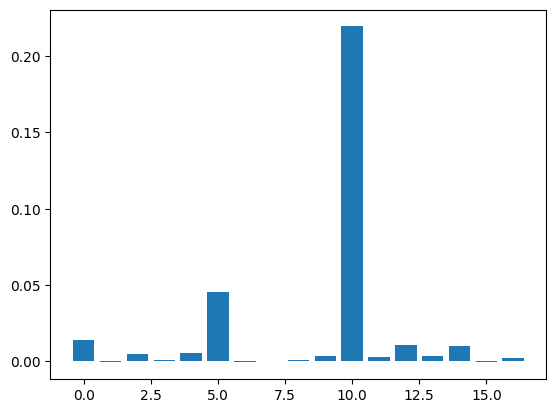

In [ ]:
model = SVC()
# fit the model
model.fit(X, y)
# perform permutation importance
results = permutation_importance(model, X, y, scoring='neg_mean_squared_error')
# get importance
importance = results.importances_mean
l1=[]
# summarize feature importance
for i,v in enumerate(importance):
    l1=l1+[abs(v)]
zipped=zip(X.columns,l1)
zipped = list(zipped)


# Printing zipped list

# Using sorted and lambda
res = sorted(zipped, key = lambda x: x[1],reverse=True)

for feature, importances in res:
  print(f"{feature} : {importances:.4f}")

# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [ ]:
model = LinearRegression()

# Train the Linear Regression model on the training data
model.fit(X, y)

# Get the feature importances (coefficients)
feature_importances = model.coef_
feature_importances4 = model.coef_


zipped=zip(X.columns,abs(feature_importances))
zipped = list(zipped)

# Printing zipped list

# Using sorted and lambda
res = sorted(zipped, key = lambda x: x[1],reverse=True)

for feature, importance in res:
  print(f"{feature} : {importance:.4f}")

Pdiabetes : 0.2351
RegularMedicine : 0.2235
Family_Diabetes : 0.1142
BPLevel : 0.0900
UriationFreq : 0.0583
PhysicallyActive : 0.0484
Stress : 0.0468
Gender : 0.0429
Age : 0.0362
SoundSleep : 0.0261
Smoking : 0.0254
Sleep : 0.0249
highBP : 0.0132
JunkFood : 0.0062
Pregancies : 0.0052
Alcohol : 0.0046
BMI : 0.0016


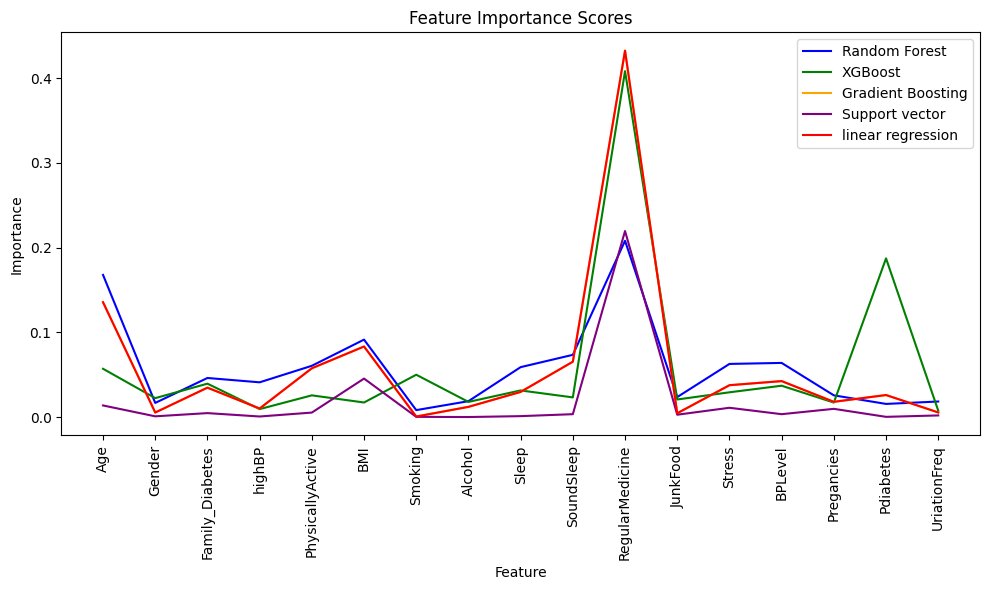

In [ ]:
plt.figure(figsize=(10, 6))

# Plot Random Forest scores in blue
plt.plot(X.columns, feature_importances1, color='blue', label='Random Forest')

# Plot XGBoost scores in green
plt.plot(X.columns, feature_importances2, color='green', label='XGBoost')

# Plot Gradient Boosting scores in orange
plt.plot(X.columns, feature_importances3, color='orange', label='Gradient Boosting')

plt.plot(X.columns, l1, color='purple', label='Support vector')

plt.plot(X.columns, feature_importances3, color='red', label='linear regression')

plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance Scores')
plt.legend()
plt.tight_layout()

# Show plot
plt.show()

In [ ]:
#chisquare
k = 7
selector = SelectKBest(score_func=chi2, k=k)
X_new = selector.fit_transform(X, y)

selected_indices = selector.get_support(indices=True)

print("Selected feature indices:", selected_indices)
for i in selected_indices:
  print(X.columns[i])

Selected feature indices: [ 0  2  3  5 10 13 15]
Age
Family_Diabetes
highBP
BMI
RegularMedicine
BPLevel
Pdiabetes


In [ ]:
#fischer's score
selector = SelectKBest(score_func=f_classif, k=k)
X_new = selector.fit_transform(X, y)

selected_indices = selector.get_support(indices=True)
print("Selected feature indices:", selected_indices)
for i in selected_indices:
  print(X.columns[i])

Selected feature indices: [ 0  2  3  5 10 12 13]
Age
Family_Diabetes
highBP
BMI
RegularMedicine
Stress
BPLevel


In [ ]:
#missing value
missing_threshold = 0.5
data1 = data[data.columns[data.isnull().mean() < missing_threshold]]
x = data.drop(columns=['Diabetic'])
data=data.apply(string_to_int.fit_transform)
q = data['Diabetic']
k =7
selector = SelectKBest(score_func=mutual_info_classif, k=k)
X_new = selector.fit_transform(x, q)

# Get the indices of selected features
selected_indices = selector.get_support(indices=True)

# Print the indices of selected features
print("Selected feature indices:", selected_indices)
for i in selected_indices:
  print(X.columns[i])

Selected feature indices: [ 0  2  3 10 12 13 15]
Age
Family_Diabetes
highBP
RegularMedicine
Stress
BPLevel
Pdiabetes


In [ ]:
#information gain
def information_gain(X, y):
    def entropy(labels):
        unique_labels, counts = np.unique(labels, return_counts=True)
        probabilities = counts / np.sum(counts)
        return -np.sum(probabilities * np.log2(probabilities))

    def conditional_entropy(feature, labels):
        unique_feature_vals = np.unique(feature)
        conditional_entropies = []
        for value in unique_feature_vals:
            subset_labels = labels[feature == value]
            conditional_entropies.append(
                len(subset_labels) / len(labels) * entropy(subset_labels)
            )
        return np.sum(conditional_entropies)

    original_entropy = entropy(y)
    information_gains = []
    for feature_column in X.T:
        info_gain = original_entropy - conditional_entropy(feature_column, y)
        information_gains.append(info_gain)
    return information_gains

info_gains = information_gain(X.values, y.values)
sorted_indices = np.argsort(info_gains)[::-1]
k = 7
selected_indices = sorted_indices[:k]
X_new = X.iloc[:, selected_indices]
print("Selected feature indices:", selected_indices)
for i in selected_indices:
  print(X.columns[i])

Selected feature indices: [10  0 13  3  5 12 14]
RegularMedicine
Age
BPLevel
highBP
BMI
Stress
Pregancies


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = xgb.XGBClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy1 = accuracy_score(y_test, y_pred)
precision1 = precision_score(y_test, y_pred,average='weighted')
recall1 = recall_score(y_test, y_pred,average='weighted')

true_positives = conf_matrix[1, 1]
false_positives = conf_matrix[0, 1]


print("Accuracy:", accuracy1)
print("Precision:", precision1)
print("Recall:", recall1)
f11 = f1_score(y_test, y_pred)
print("F1-score:", f11)
print("True Positives:", true_positives)
print("False Positives:", false_positives)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.93717277486911
Precision: 0.9371519986703233
Recall: 0.93717277486911
F1-score: 0.9523809523809523
True Positives: 59
False Positives: 4
Confusion Matrix:
 [[120   4]
 [  8  59]]


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the testing data
predictions = clf.predict(X_test)

y_pred = clf.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy2 = accuracy_score(y_test, y_pred)
precision2 = precision_score(y_test, y_pred,average='weighted')
recall2 = recall_score(y_test, y_pred,average='weighted')
true_positives = conf_matrix[1, 1]
false_positives = conf_matrix[0, 1]


print("Accuracy:", accuracy2)
print("Precision:", precision2)
print("Recall:", recall2)
print("True Positives:", true_positives)
print("False Positives:", false_positives)
print("Confusion Matrix:\n", conf_matrix)

f12 = f1_score(y_test, y_pred)
print("F1-score:", f12)

Accuracy: 0.9424083769633508
Precision: 0.9422924310508308
Recall: 0.9424083769633508
True Positives: 60
False Positives: 4
Confusion Matrix:
 [[120   4]
 [  7  60]]
F1-score: 0.9561752988047808


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Gradient Boosting Classifier
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the testing data
predictions = clf.predict(X_test)

y_pred = clf.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy3 = accuracy_score(y_test, y_pred)
precision3 = precision_score(y_test, y_pred,average='weighted')
recall3 = recall_score(y_test, y_pred,average='weighted')
true_positives = conf_matrix[1, 1]
false_positives = conf_matrix[0, 1]


print("Accuracy:", accuracy3)
print("Precision:", precision3)
print("Recall:", recall3)
print("True Positives:", true_positives)
print("False Positives:", false_positives)
print("Confusion Matrix:\n", conf_matrix)

f13 = f1_score(y_test, y_pred)
print("F1-score:", f13)

Accuracy: 0.9319371727748691
Precision: 0.931699483654203
Recall: 0.9319371727748691
True Positives: 59
False Positives: 5
Confusion Matrix:
 [[119   5]
 [  8  59]]
F1-score: 0.9482071713147411


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an SVM classifier
model = SVC(kernel='linear')  # You can choose a different kernel if needed

# Train the SVM classifier on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy4 = accuracy_score(y_test, y_pred)
precision4 = precision_score(y_test, y_pred,average='weighted')
recall4 = recall_score(y_test, y_pred,average='weighted')
true_positives = conf_matrix[1, 1]
false_positives = conf_matrix[0, 1]

print("Accuracy:", accuracy4)
print("Precision:", precision4)
print("Recall:", recall4)
print("True Positives:", true_positives)
print("False Positives:", false_positives)
print("Confusion Matrix:\n", conf_matrix)
f14 = f1_score(y_test, y_pred)
print("F1-score:", f14)

Accuracy: 0.8324607329842932
Precision: 0.8303572489650938
Recall: 0.8324607329842932
True Positives: 48
False Positives: 13
Confusion Matrix:
 [[111  13]
 [ 19  48]]
F1-score: 0.8740157480314961


<Figure size 4000x20000 with 0 Axes>

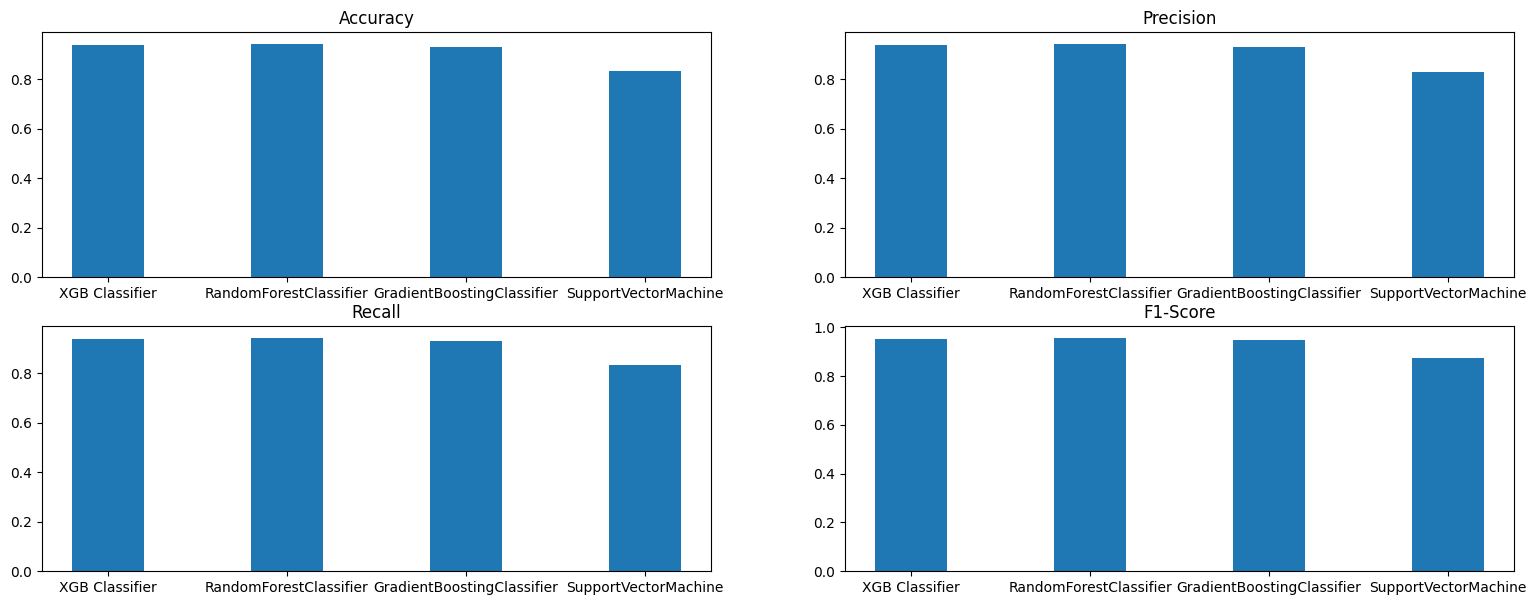

In [ ]:
plt.figure(figsize=(40, 200))
figure, axis = plt.subplots(2, 2, figsize=(19, 7))
X=["XGB Classifier","RandomForestClassifier","GradientBoostingClassifier","SupportVectorMachine"]
Y1=[accuracy1,accuracy2,accuracy3,accuracy4]
Y2=[precision1,precision2,precision3,precision4]
Y3=[recall1,recall2,recall3,recall4]
Y4=[f11,f12,f13,f14]
# For Sine Function
axis[0, 0].bar(X, Y1,width = 0.4)
axis[0, 0].set_title("Accuracy")

# For Cosine Function
axis[0, 1].bar(X, Y2,width = 0.4)
axis[0, 1].set_title("Precision")

# For Tangent Function
axis[1, 0].bar(X, Y3,width = 0.4)
axis[1, 0].set_title("Recall")

# For Tanh Function
axis[1, 1].bar(X, Y4,width = 0.4)
axis[1, 1].set_title("F1-Score")
# Combine all the operations and display
plt.show()

In [ ]:
#random forest
X1 = X[["RegularMedicine","Age","BMI","SoundSleep","BPLevel","Stress","PhysicallyActive"]]
y = data['Diabetic']
print(X1)
print(y)

     RegularMedicine  Age  BMI  SoundSleep  BPLevel  Stress  PhysicallyActive
0                  0    1   22           6        2       2                 3
1                  2    1   12           6        4       2                 0
2                  0    0    8           6        4       2                 3
3                  0    1    7           6        4       2                 3
4                  0    0   11           8        4       2                 0
..               ...  ...  ...         ...      ...     ...               ...
947                0    3    9           6        4       2                 1
948                2    2   11           5        2       2                 1
949                2    2    7           5        2       2                 2
950                2    2   11           5        2       3                 0
951                2    2   14           4        2       2                 3

[952 rows x 7 columns]
0      1
1      1
2      1
3      1
4   

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)
model = xgb.XGBClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,average='weighted')
recall = recall_score(y_test, y_pred,average='weighted')
true_positives = conf_matrix[1, 1]
false_positives = conf_matrix[0, 1]


print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("True Positives:", true_positives)
print("False Positives:", false_positives)
print("Confusion Matrix:\n", conf_matrix)
f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)

Accuracy: 0.93717277486911
Precision: 0.9371519986703233
Recall: 0.93717277486911
True Positives: 59
False Positives: 4
Confusion Matrix:
 [[120   4]
 [  8  59]]
F1-score: 0.9523809523809523


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)

# Create a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the testing data
predictions = clf.predict(X_test)

y_pred = clf.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,average='weighted')
recall = recall_score(y_test, y_pred,average='weighted')
true_positives = conf_matrix[1, 1]
false_positives = conf_matrix[0, 1]


print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("True Positives:", true_positives)
print("False Positives:", false_positives)
print("Confusion Matrix:\n", conf_matrix)
f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)

Accuracy: 0.93717277486911
Precision: 0.9371519986703233
Recall: 0.93717277486911
True Positives: 59
False Positives: 4
Confusion Matrix:
 [[120   4]
 [  8  59]]
F1-score: 0.9523809523809523


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)

# Create a Gradient Boosting Classifier
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the testing data
predictions = clf.predict(X_test)

y_pred = clf.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,average='weighted')
recall = recall_score(y_test, y_pred,average='weighted')
true_positives = conf_matrix[1, 1]
false_positives = conf_matrix[0, 1]


print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("True Positives:", true_positives)
print("False Positives:", false_positives)
print("Confusion Matrix:\n", conf_matrix)
f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)

Accuracy: 0.9319371727748691
Precision: 0.9317544026653974
Recall: 0.9319371727748691
True Positives: 60
False Positives: 6
Confusion Matrix:
 [[118   6]
 [  7  60]]
F1-score: 0.9477911646586344


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)

# Create an SVM classifier
model = SVC(kernel='linear')  # You can choose a different kernel if needed

# Train the SVM classifier on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,average='weighted')
recall = recall_score(y_test, y_pred,average='weighted')
true_positives = conf_matrix[1, 1]
false_positives = conf_matrix[0, 1]

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("True Positives:", true_positives)
print("False Positives:", false_positives)
print("Confusion Matrix:\n", conf_matrix)
f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)

Accuracy: 0.8010471204188482
Precision: 0.8109361934107042
Recall: 0.8010471204188482
True Positives: 53
False Positives: 24
Confusion Matrix:
 [[100  24]
 [ 14  53]]
F1-score: 0.8403361344537815


In [ ]:
#XGBClassifier
X1 = X[["RegularMedicine","Pdiabetes","Age","Smoking","Family_Diabetes","BPLevel","Sleep"]]
y = data['Diabetic']
print(X1)
print(y)

     RegularMedicine  Pdiabetes  Age  Smoking  Family_Diabetes  BPLevel  Sleep
0                  0          0    1        0                0        2      4
1                  2          0    1        0                0        4      4
2                  0          0    0        0                0        4      2
3                  0          0    1        0                0        4      4
4                  0          0    0        0                0        4      4
..               ...        ...  ...      ...              ...      ...    ...
947                0          0    3        0                1        4      4
948                2          0    2        0                1        2      2
949                2          0    2        0                0        2      2
950                2          0    2        0                0        2      2
951                2          0    2        0                1        2      3

[952 rows x 7 columns]
0      1
1      1
2      1
3

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)
model = xgb.XGBClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,average='weighted')
recall = recall_score(y_test, y_pred,average='weighted')
true_positives = conf_matrix[1, 1]
false_positives = conf_matrix[0, 1]


print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("True Positives:", true_positives)
print("False Positives:", false_positives)
print("Confusion Matrix:\n", conf_matrix)
f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)

Accuracy: 0.900523560209424
Precision: 0.8999206414643196
Recall: 0.900523560209424
True Positives: 56
False Positives: 8
Confusion Matrix:
 [[116   8]
 [ 11  56]]
F1-score: 0.9243027888446215


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)

# Create a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the testing data
predictions = clf.predict(X_test)

y_pred = clf.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,average='weighted')
recall = recall_score(y_test, y_pred,average='weighted')
true_positives = conf_matrix[1, 1]
false_positives = conf_matrix[0, 1]


print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("True Positives:", true_positives)
print("False Positives:", false_positives)
print("Confusion Matrix:\n", conf_matrix)
f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)

Accuracy: 0.900523560209424
Precision: 0.8999206414643196
Recall: 0.900523560209424
True Positives: 56
False Positives: 8
Confusion Matrix:
 [[116   8]
 [ 11  56]]
F1-score: 0.9243027888446215


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)

# Create a Gradient Boosting Classifier
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the testing data
predictions = clf.predict(X_test)

y_pred = clf.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,average='weighted')
recall = recall_score(y_test, y_pred,average='weighted')
true_positives = conf_matrix[1, 1]
false_positives = conf_matrix[0, 1]


print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("True Positives:", true_positives)
print("False Positives:", false_positives)
print("Confusion Matrix:\n", conf_matrix)
f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)

Accuracy: 0.8848167539267016
Precision: 0.8840799403154567
Recall: 0.8848167539267016
True Positives: 53
False Positives: 8
Confusion Matrix:
 [[116   8]
 [ 14  53]]
F1-score: 0.9133858267716536


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)

# Create an SVM classifier
model = SVC(kernel='linear')  # You can choose a different kernel if needed

# Train the SVM classifier on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,average='weighted')
recall = recall_score(y_test, y_pred,average='weighted')
true_positives = conf_matrix[1, 1]
false_positives = conf_matrix[0, 1]

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("True Positives:", true_positives)
print("False Positives:", false_positives)
print("Confusion Matrix:\n", conf_matrix)
f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)

Accuracy: 0.806282722513089
Precision: 0.8201942125371444
Recall: 0.806282722513089
True Positives: 55
False Positives: 25
Confusion Matrix:
 [[99 25]
 [12 55]]
F1-score: 0.8425531914893617


In [ ]:
#Gradient Boosting
X1 = X[["RegularMedicine","Age","BMI","SoundSleep","BPLevel","Stress","PhysicallyActive"]]
y = data['Diabetic']
print(X1)
print(y)

     RegularMedicine  Age  BMI  SoundSleep  BPLevel  Stress  PhysicallyActive
0                  0    1   22           6        2       2                 3
1                  2    1   12           6        4       2                 0
2                  0    0    8           6        4       2                 3
3                  0    1    7           6        4       2                 3
4                  0    0   11           8        4       2                 0
..               ...  ...  ...         ...      ...     ...               ...
947                0    3    9           6        4       2                 1
948                2    2   11           5        2       2                 1
949                2    2    7           5        2       2                 2
950                2    2   11           5        2       3                 0
951                2    2   14           4        2       2                 3

[952 rows x 7 columns]
0      1
1      1
2      1
3      1
4   

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)
model = xgb.XGBClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,average='weighted')
recall = recall_score(y_test, y_pred,average='weighted')
true_positives = conf_matrix[1, 1]
false_positives = conf_matrix[0, 1]


print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("True Positives:", true_positives)
print("False Positives:", false_positives)
print("Confusion Matrix:\n", conf_matrix)
f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)

Accuracy: 0.93717277486911
Precision: 0.9371519986703233
Recall: 0.93717277486911
True Positives: 59
False Positives: 4
Confusion Matrix:
 [[120   4]
 [  8  59]]
F1-score: 0.9523809523809523


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)

# Create a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the testing data
predictions = clf.predict(X_test)

y_pred = clf.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,average='weighted')
recall = recall_score(y_test, y_pred,average='weighted')
true_positives = conf_matrix[1, 1]
false_positives = conf_matrix[0, 1]


print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("True Positives:", true_positives)
print("False Positives:", false_positives)
print("Confusion Matrix:\n", conf_matrix)
f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)

Accuracy: 0.93717277486911
Precision: 0.9371519986703233
Recall: 0.93717277486911
True Positives: 59
False Positives: 4
Confusion Matrix:
 [[120   4]
 [  8  59]]
F1-score: 0.9523809523809523


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)

# Create a Gradient Boosting Classifier
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the testing data
predictions = clf.predict(X_test)

y_pred = clf.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,average='weighted')
recall = recall_score(y_test, y_pred,average='weighted')
true_positives = conf_matrix[1, 1]
false_positives = conf_matrix[0, 1]


print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("True Positives:", true_positives)
print("False Positives:", false_positives)
print("Confusion Matrix:\n", conf_matrix)
f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)

Accuracy: 0.9319371727748691
Precision: 0.9317544026653974
Recall: 0.9319371727748691
True Positives: 60
False Positives: 6
Confusion Matrix:
 [[118   6]
 [  7  60]]
F1-score: 0.9477911646586344


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)

# Create an SVM classifier
model = SVC(kernel='linear')  # You can choose a different kernel if needed

# Train the SVM classifier on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,average='weighted')
recall = recall_score(y_test, y_pred,average='weighted')
true_positives = conf_matrix[1, 1]
false_positives = conf_matrix[0, 1]

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("True Positives:", true_positives)
print("False Positives:", false_positives)
print("Confusion Matrix:\n", conf_matrix)
f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)

Accuracy: 0.8010471204188482
Precision: 0.8109361934107042
Recall: 0.8010471204188482
True Positives: 53
False Positives: 24
Confusion Matrix:
 [[100  24]
 [ 14  53]]
F1-score: 0.8403361344537815


In [ ]:
#SVM
X1 = X[["RegularMedicine","Age","BMI","Pregancies","JunkFood","Stress","PhysicallyActive"]]
y = data['Diabetic']
print(X1)
print(y)

     RegularMedicine  Age  BMI  Pregancies  JunkFood  Stress  PhysicallyActive
0                  0    1   22           0         1       2                 3
1                  2    1   12           0         3       2                 0
2                  0    0    8           0         1       2                 3
3                  0    1    7           0         1       2                 3
4                  0    0   11           0         1       2                 0
..               ...  ...  ...         ...       ...     ...               ...
947                0    3    9           0         2       2                 1
948                2    2   11           0         1       2                 1
949                2    2    7           0         1       2                 2
950                2    2   11           0         1       3                 0
951                2    2   14           2         1       2                 3

[952 rows x 7 columns]
0      1
1      1
2      1
3

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)
model = xgb.XGBClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,average='weighted')
recall = recall_score(y_test, y_pred,average='weighted')
true_positives = conf_matrix[1, 1]
false_positives = conf_matrix[0, 1]


print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("True Positives:", true_positives)
print("False Positives:", false_positives)
print("Confusion Matrix:\n", conf_matrix)
f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)

Accuracy: 0.9267015706806283
Precision: 0.9263998363474802
Recall: 0.9267015706806283
True Positives: 59
False Positives: 6
Confusion Matrix:
 [[118   6]
 [  8  59]]
F1-score: 0.944


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)

# Create a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the testing data
predictions = clf.predict(X_test)

y_pred = clf.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,average='weighted')
recall = recall_score(y_test, y_pred,average='weighted')
true_positives = conf_matrix[1, 1]
false_positives = conf_matrix[0, 1]


print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("True Positives:", true_positives)
print("False Positives:", false_positives)
print("Confusion Matrix:\n", conf_matrix)
f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)

Accuracy: 0.93717277486911
Precision: 0.9371519986703233
Recall: 0.93717277486911
True Positives: 59
False Positives: 4
Confusion Matrix:
 [[120   4]
 [  8  59]]
F1-score: 0.9523809523809523


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)

# Create a Gradient Boosting Classifier
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the testing data
predictions = clf.predict(X_test)

y_pred = clf.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,average='weighted')
recall = recall_score(y_test, y_pred,average='weighted')
true_positives = conf_matrix[1, 1]
false_positives = conf_matrix[0, 1]


print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("True Positives:", true_positives)
print("False Positives:", false_positives)
print("Confusion Matrix:\n", conf_matrix)
f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)

Accuracy: 0.9162303664921466
Precision: 0.9163135551256744
Recall: 0.9162303664921466
True Positives: 56
False Positives: 5
Confusion Matrix:
 [[119   5]
 [ 11  56]]
F1-score: 0.9370078740157479


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)

# Create an SVM classifier
model = SVC(kernel='linear')  # You can choose a different kernel if needed

# Train the SVM classifier on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,average='weighted')
recall = recall_score(y_test, y_pred,average='weighted')
true_positives = conf_matrix[1, 1]
false_positives = conf_matrix[0, 1]

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("True Positives:", true_positives)
print("False Positives:", false_positives)
print("Confusion Matrix:\n", conf_matrix)
f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)

Accuracy: 0.8010471204188482
Precision: 0.8109361934107042
Recall: 0.8010471204188482
True Positives: 53
False Positives: 24
Confusion Matrix:
 [[100  24]
 [ 14  53]]
F1-score: 0.8403361344537815


In [ ]:
#Linear regression
X1 = X[["Pdiabetes","RegularMedicine","Family_Diabetes","BPLevel","UriationFreq","PhysicallyActive","Stress"]]
y = data['Diabetic']
print(X1)
print(y)
f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)

     Pdiabetes  RegularMedicine  Family_Diabetes  BPLevel  UriationFreq  \
0            0                0                0        2             0   
1            0                2                0        4             0   
2            0                0                0        4             0   
3            0                0                0        4             0   
4            0                0                0        4             0   
..         ...              ...              ...      ...           ...   
947          0                0                1        4             0   
948          0                2                1        2             1   
949          0                2                0        2             0   
950          0                2                0        2             0   
951          0                2                1        2             1   

     PhysicallyActive  Stress  
0                   3       2  
1                   0       2  
2  

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)
model = xgb.XGBClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,average='weighted')
recall = recall_score(y_test, y_pred,average='weighted')
true_positives = conf_matrix[1, 1]
false_positives = conf_matrix[0, 1]


print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("True Positives:", true_positives)
print("False Positives:", false_positives)
print("Confusion Matrix:\n", conf_matrix)
f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)

Accuracy: 0.8743455497382199
Precision: 0.8775224163083923
Recall: 0.8743455497382199
True Positives: 48
False Positives: 5
Confusion Matrix:
 [[119   5]
 [ 19  48]]
F1-score: 0.9083969465648856


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)

# Create a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the testing data
predictions = clf.predict(X_test)

y_pred = clf.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,average='weighted')
recall = recall_score(y_test, y_pred,average='weighted')
true_positives = conf_matrix[1, 1]
false_positives = conf_matrix[0, 1]


print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("True Positives:", true_positives)
print("False Positives:", false_positives)
print("Confusion Matrix:\n", conf_matrix)
f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)

Accuracy: 0.8691099476439791
Precision: 0.8695898778359511
Recall: 0.8691099476439791
True Positives: 49
False Positives: 7
Confusion Matrix:
 [[117   7]
 [ 18  49]]
F1-score: 0.9034749034749036


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)

# Create a Gradient Boosting Classifier
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the testing data
predictions = clf.predict(X_test)

y_pred = clf.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,average='weighted')
recall = recall_score(y_test, y_pred,average='weighted')
true_positives = conf_matrix[1, 1]
false_positives = conf_matrix[0, 1]


print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("True Positives:", true_positives)
print("False Positives:", false_positives)
print("Confusion Matrix:\n", conf_matrix)
f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)

Accuracy: 0.8743455497382199
Precision: 0.8758070386650615
Recall: 0.8743455497382199
True Positives: 49
False Positives: 6
Confusion Matrix:
 [[118   6]
 [ 18  49]]
F1-score: 0.9076923076923077


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)

# Create an SVM classifier
model = SVC(kernel='linear')  # You can choose a different kernel if needed

# Train the SVM classifier on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,average='weighted')
recall = recall_score(y_test, y_pred,average='weighted')
true_positives = conf_matrix[1, 1]
false_positives = conf_matrix[0, 1]

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("True Positives:", true_positives)
print("False Positives:", false_positives)
print("Confusion Matrix:\n", conf_matrix)
f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)

Accuracy: 0.8167539267015707
Precision: 0.8144791433460459
Recall: 0.8167539267015707
True Positives: 47
False Positives: 15
Confusion Matrix:
 [[109  15]
 [ 20  47]]
F1-score: 0.8616600790513833


In [ ]:
#Chisquare
X1 = X[["RegularMedicine","Age","BMI","highBP","BPLevel","Pdiabetes","Family_Diabetes"]]
y = data['Diabetic']
print(X1)
print(y)

     RegularMedicine  Age  BMI  highBP  BPLevel  Pdiabetes  Family_Diabetes
0                  0    1   22       1        2          0                0
1                  2    1   12       1        4          0                0
2                  0    0    8       0        4          0                0
3                  0    1    7       0        4          0                0
4                  0    0   11       0        4          0                0
..               ...  ...  ...     ...      ...        ...              ...
947                0    3    9       0        4          0                1
948                2    2   11       1        2          0                1
949                2    2    7       1        2          0                0
950                2    2   11       1        2          0                0
951                2    2   14       1        2          0                1

[952 rows x 7 columns]
0      1
1      1
2      1
3      1
4      1
      ..
947    2
9

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)
model = xgb.XGBClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,average='weighted')
recall = recall_score(y_test, y_pred,average='weighted')
true_positives = conf_matrix[1, 1]
false_positives = conf_matrix[0, 1]


print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("True Positives:", true_positives)
print("False Positives:", false_positives)
print("Confusion Matrix:\n", conf_matrix)
f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)

Accuracy: 0.9162303664921466
Precision: 0.9158719770630765
Recall: 0.9162303664921466
True Positives: 57
False Positives: 6
Confusion Matrix:
 [[118   6]
 [ 10  57]]
F1-score: 0.9365079365079365


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)

# Create a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the testing data
predictions = clf.predict(X_test)

y_pred = clf.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,average='weighted')
recall = recall_score(y_test, y_pred,average='weighted')
true_positives = conf_matrix[1, 1]
false_positives = conf_matrix[0, 1]


print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("True Positives:", true_positives)
print("False Positives:", false_positives)
print("Confusion Matrix:\n", conf_matrix)
f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)

Accuracy: 0.9162303664921466
Precision: 0.9158719770630765
Recall: 0.9162303664921466
True Positives: 57
False Positives: 6
Confusion Matrix:
 [[118   6]
 [ 10  57]]
F1-score: 0.9365079365079365


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)

# Create a Gradient Boosting Classifier
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the testing data
predictions = clf.predict(X_test)

y_pred = clf.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,average='weighted')
recall = recall_score(y_test, y_pred,average='weighted')
true_positives = conf_matrix[1, 1]
false_positives = conf_matrix[0, 1]


print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("True Positives:", true_positives)
print("False Positives:", false_positives)
print("Confusion Matrix:\n", conf_matrix)
f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)

Accuracy: 0.9057591623036649
Precision: 0.9075550876096233
Recall: 0.9057591623036649
True Positives: 53
False Positives: 4
Confusion Matrix:
 [[120   4]
 [ 14  53]]
F1-score: 0.930232558139535


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)

# Create an SVM classifier
model = SVC(kernel='linear')  # You can choose a different kernel if needed

# Train the SVM classifier on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,average='weighted')
recall = recall_score(y_test, y_pred,average='weighted')
true_positives = conf_matrix[1, 1]
false_positives = conf_matrix[0, 1]

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("True Positives:", true_positives)
print("False Positives:", false_positives)
print("Confusion Matrix:\n", conf_matrix)
f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)

Accuracy: 0.806282722513089
Precision: 0.8201942125371444
Recall: 0.806282722513089
True Positives: 55
False Positives: 25
Confusion Matrix:
 [[99 25]
 [12 55]]
F1-score: 0.8425531914893617


In [ ]:
#fischer's score
X1 = X[["RegularMedicine","Age","BMI","Family_Diabetes","BPLevel","Stress","highBP"]]
y = data['Diabetic']
print(X1)
print(y)

     RegularMedicine  Age  BMI  Family_Diabetes  BPLevel  Stress  highBP
0                  0    1   22                0        2       2       1
1                  2    1   12                0        4       2       1
2                  0    0    8                0        4       2       0
3                  0    1    7                0        4       2       0
4                  0    0   11                0        4       2       0
..               ...  ...  ...              ...      ...     ...     ...
947                0    3    9                1        4       2       0
948                2    2   11                1        2       2       1
949                2    2    7                0        2       2       1
950                2    2   11                0        2       3       1
951                2    2   14                1        2       2       1

[952 rows x 7 columns]
0      1
1      1
2      1
3      1
4      1
      ..
947    2
948    2
949    1
950    1
951    2
N

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)
model = xgb.XGBClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,average='weighted')
recall = recall_score(y_test, y_pred,average='weighted')
true_positives = conf_matrix[1, 1]
false_positives = conf_matrix[0, 1]


print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("True Positives:", true_positives)
print("False Positives:", false_positives)
print("Confusion Matrix:\n", conf_matrix)
f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)

Accuracy: 0.9319371727748691
Precision: 0.9320746416970734
Recall: 0.9319371727748691
True Positives: 58
False Positives: 4
Confusion Matrix:
 [[120   4]
 [  9  58]]
F1-score: 0.9486166007905139


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)

# Create a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the testing data
predictions = clf.predict(X_test)

y_pred = clf.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,average='weighted')
recall = recall_score(y_test, y_pred,average='weighted')
true_positives = conf_matrix[1, 1]
false_positives = conf_matrix[0, 1]


print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("True Positives:", true_positives)
print("False Positives:", false_positives)
print("Confusion Matrix:\n", conf_matrix)
f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)

Accuracy: 0.9319371727748691
Precision: 0.931699483654203
Recall: 0.9319371727748691
True Positives: 59
False Positives: 5
Confusion Matrix:
 [[119   5]
 [  8  59]]
F1-score: 0.9482071713147411


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)

# Create a Gradient Boosting Classifier
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the testing data
predictions = clf.predict(X_test)

y_pred = clf.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,average='weighted')
recall = recall_score(y_test, y_pred,average='weighted')
true_positives = conf_matrix[1, 1]
false_positives = conf_matrix[0, 1]


print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("True Positives:", true_positives)
print("False Positives:", false_positives)
print("Confusion Matrix:\n", conf_matrix)
f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)

Accuracy: 0.9057591623036649
Precision: 0.9055690168556016
Recall: 0.9057591623036649
True Positives: 55
False Positives: 6
Confusion Matrix:
 [[118   6]
 [ 12  55]]
F1-score: 0.9291338582677167


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)

# Create an SVM classifier
model = SVC(kernel='linear')  # You can choose a different kernel if needed

# Train the SVM classifier on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,average='weighted')
recall = recall_score(y_test, y_pred,average='weighted')
true_positives = conf_matrix[1, 1]
false_positives = conf_matrix[0, 1]

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("True Positives:", true_positives)
print("False Positives:", false_positives)
print("Confusion Matrix:\n", conf_matrix)
f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)

Accuracy: 0.8010471204188482
Precision: 0.8109361934107042
Recall: 0.8010471204188482
True Positives: 53
False Positives: 24
Confusion Matrix:
 [[100  24]
 [ 14  53]]
F1-score: 0.8403361344537815


In [ ]:
#missing value
X1 = X[["RegularMedicine","Age","highBP","Pdiabetes","BPLevel","Stress","Family_Diabetes"]]
y = data['Diabetic']
print(X1)
print(y)

     RegularMedicine  Age  highBP  Pdiabetes  BPLevel  Stress  Family_Diabetes
0                  0    1       1          0        2       2                0
1                  2    1       1          0        4       2                0
2                  0    0       0          0        4       2                0
3                  0    1       0          0        4       2                0
4                  0    0       0          0        4       2                0
..               ...  ...     ...        ...      ...     ...              ...
947                0    3       0          0        4       2                1
948                2    2       1          0        2       2                1
949                2    2       1          0        2       2                0
950                2    2       1          0        2       3                0
951                2    2       1          0        2       2                1

[952 rows x 7 columns]
0      1
1      1
2      1
3

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)
model = xgb.XGBClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,average='weighted')
recall = recall_score(y_test, y_pred,average='weighted')
true_positives = conf_matrix[1, 1]
false_positives = conf_matrix[0, 1]


print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("True Positives:", true_positives)
print("False Positives:", false_positives)
print("Confusion Matrix:\n", conf_matrix)
f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)

Accuracy: 0.8638743455497382
Precision: 0.8661993709260158
Recall: 0.8638743455497382
True Positives: 47
False Positives: 6
Confusion Matrix:
 [[118   6]
 [ 20  47]]
F1-score: 0.900763358778626


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)

# Create a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the testing data
predictions = clf.predict(X_test)

y_pred = clf.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,average='weighted')
recall = recall_score(y_test, y_pred,average='weighted')
true_positives = conf_matrix[1, 1]
false_positives = conf_matrix[0, 1]


print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("True Positives:", true_positives)
print("False Positives:", false_positives)
print("Confusion Matrix:\n", conf_matrix)
f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)

Accuracy: 0.8638743455497382
Precision: 0.8661993709260158
Recall: 0.8638743455497382
True Positives: 47
False Positives: 6
Confusion Matrix:
 [[118   6]
 [ 20  47]]
F1-score: 0.900763358778626


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)

# Create a Gradient Boosting Classifier
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the testing data
predictions = clf.predict(X_test)

y_pred = clf.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,average='weighted')
recall = recall_score(y_test, y_pred,average='weighted')
true_positives = conf_matrix[1, 1]
false_positives = conf_matrix[0, 1]


print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("True Positives:", true_positives)
print("False Positives:", false_positives)
print("Confusion Matrix:\n", conf_matrix)
f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)

Accuracy: 0.8743455497382199
Precision: 0.8758070386650615
Recall: 0.8743455497382199
True Positives: 49
False Positives: 6
Confusion Matrix:
 [[118   6]
 [ 18  49]]
F1-score: 0.9076923076923077


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)

# Create an SVM classifier
model = SVC(kernel='linear')  # You can choose a different kernel if needed

# Train the SVM classifier on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,average='weighted')
recall = recall_score(y_test, y_pred,average='weighted')
true_positives = conf_matrix[1, 1]
false_positives = conf_matrix[0, 1]

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("True Positives:", true_positives)
print("False Positives:", false_positives)
print("Confusion Matrix:\n", conf_matrix)
f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)

Accuracy: 0.806282722513089
Precision: 0.8201942125371444
Recall: 0.806282722513089
True Positives: 55
False Positives: 25
Confusion Matrix:
 [[99 25]
 [12 55]]
F1-score: 0.8425531914893617


In [ ]:
#information gain
X1 = X[["RegularMedicine","Age","BMI","Pregancies","BPLevel","Stress","highBP"]]
y = data['Diabetic']
print(X1)
print(y)

     RegularMedicine  Age  BMI  Pregancies  BPLevel  Stress  highBP
0                  0    1   22           0        2       2       1
1                  2    1   12           0        4       2       1
2                  0    0    8           0        4       2       0
3                  0    1    7           0        4       2       0
4                  0    0   11           0        4       2       0
..               ...  ...  ...         ...      ...     ...     ...
947                0    3    9           0        4       2       0
948                2    2   11           0        2       2       1
949                2    2    7           0        2       2       1
950                2    2   11           0        2       3       1
951                2    2   14           2        2       2       1

[952 rows x 7 columns]
0      1
1      1
2      1
3      1
4      1
      ..
947    2
948    2
949    1
950    1
951    2
Name: Diabetic, Length: 952, dtype: int64


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)
model = xgb.XGBClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,average='weighted')
recall = recall_score(y_test, y_pred,average='weighted')
true_positives = conf_matrix[1, 1]
false_positives = conf_matrix[0, 1]


print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("True Positives:", true_positives)
print("False Positives:", false_positives)
print("Confusion Matrix:\n", conf_matrix)
f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)

Accuracy: 0.9057591623036649
Precision: 0.9053014466627032
Recall: 0.9057591623036649
True Positives: 57
False Positives: 8
Confusion Matrix:
 [[116   8]
 [ 10  57]]
F1-score: 0.9279999999999999


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)

# Create a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the testing data
predictions = clf.predict(X_test)

y_pred = clf.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,average='weighted')
recall = recall_score(y_test, y_pred,average='weighted')
true_positives = conf_matrix[1, 1]
false_positives = conf_matrix[0, 1]


print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("True Positives:", true_positives)
print("False Positives:", false_positives)
print("Confusion Matrix:\n", conf_matrix)
f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)

Accuracy: 0.9109947643979057
Precision: 0.9113471847684291
Recall: 0.9109947643979057
True Positives: 59
False Positives: 9
Confusion Matrix:
 [[115   9]
 [  8  59]]
F1-score: 0.9311740890688259


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)

# Create a Gradient Boosting Classifier
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the testing data
predictions = clf.predict(X_test)

y_pred = clf.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,average='weighted')
recall = recall_score(y_test, y_pred,average='weighted')
true_positives = conf_matrix[1, 1]
false_positives = conf_matrix[0, 1]


print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("True Positives:", true_positives)
print("False Positives:", false_positives)
print("Confusion Matrix:\n", conf_matrix)
f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)

Accuracy: 0.900523560209424
Precision: 0.8999206414643196
Recall: 0.900523560209424
True Positives: 56
False Positives: 8
Confusion Matrix:
 [[116   8]
 [ 11  56]]
F1-score: 0.9243027888446215


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)

# Create an SVM classifier
model = SVC(kernel='linear')  # You can choose a different kernel if needed

# Train the SVM classifier on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,average='weighted')
recall = recall_score(y_test, y_pred,average='weighted')
true_positives = conf_matrix[1, 1]
false_positives = conf_matrix[0, 1]

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("True Positives:", true_positives)
print("False Positives:", false_positives)
print("Confusion Matrix:\n", conf_matrix)
f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)

Accuracy: 0.8010471204188482
Precision: 0.8109361934107042
Recall: 0.8010471204188482
True Positives: 53
False Positives: 24
Confusion Matrix:
 [[100  24]
 [ 14  53]]
F1-score: 0.8403361344537815


In [ ]:
label_encoder = LabelEncoder()
B = label_encoder.fit_transform(B)
feature_names = list(X_train.columns)
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(A, B, test_size=0.2, random_state=42)

# Create and train a machine learning model (e.g., RandomForestClassifier)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Initialize a LIME explainer
explainer = LimeTabularExplainer(X_train.values, feature_names =
                                 feature_names,
                                 mode = 'classification')


instance_idx = 13  # Change this to the index of the instance you want to explain

# Explain the model's prediction for the selected instance
#explanation = explainer.explain_instance(X_test.values[instance_idx], model.predict_proba, num_features=len(X.columns))
explanation = explainer.explain_instance(X_test.values[instance_idx], model.predict_proba, num_features=6)

# Print the explanation
explanation.show_in_notebook()


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Variable Importance Plot - Global Interpretation


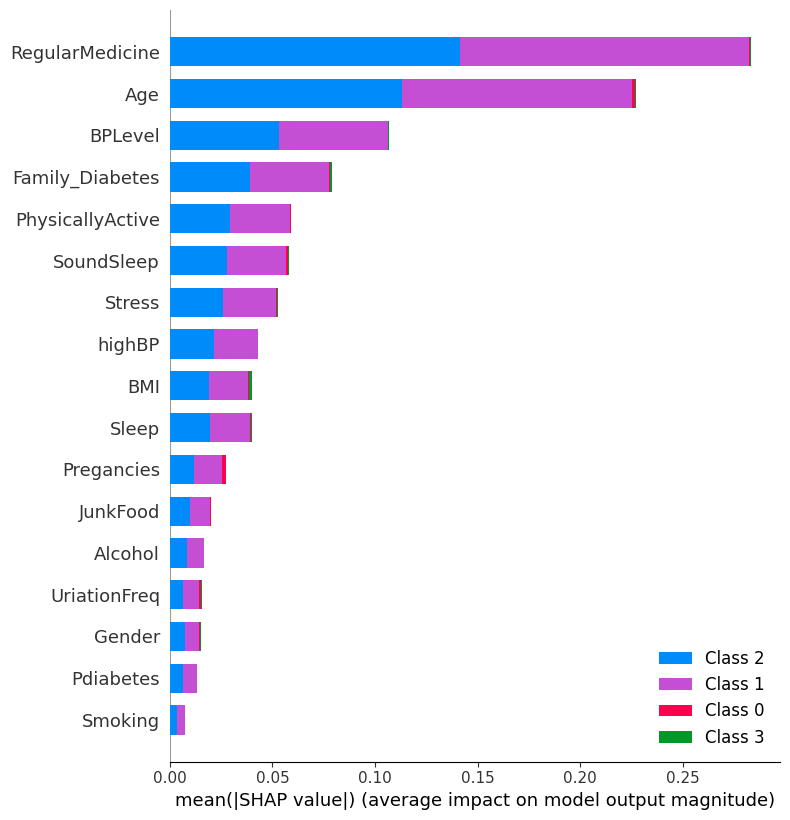

In [ ]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a machine learning model (e.g., RandomForestClassifier)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Initialize a SHAP explainer
explainer = shap.TreeExplainer(model)

shap_values = explainer.shap_values(X_test)

print("Variable Importance Plot - Global Interpretation")
figure = plt.figure()
shap.summary_plot(shap_values, X_test)



No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


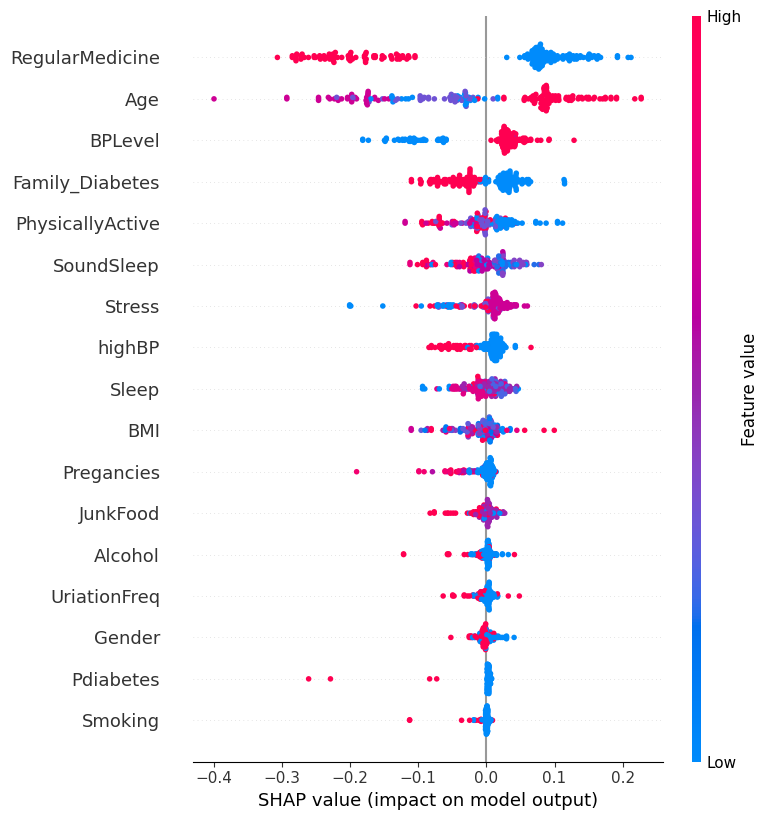

In [ ]:
shap.summary_plot(shap_values[1], X_test)